In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('ggplot')
pd.options.display.max_columns=100
warnings.filterwarnings('ignore')

In [37]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

# Save the number of rows in the training set
n_train = train.shape[0]
print(n_train)

# Concatenate train & test
df = pd.concat((train, test)).reset_index(drop=True)
#print no. of rows of df
print(df.shape)

(54273, 13) (36183, 12)
54273
(90456, 13)


In [38]:
df.sample(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
66004,66004,Land,Rover Range Rover Sport HSE Dynamic,2019,15600,Gasoline,380.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,White,Gray,None reported,Yes,NaN
10113,10113,Bentley,Bentayga V8,2020,24500,Gasoline,542.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,Yes,114000.0


In [39]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000.0
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250.0
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000.0
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500.0
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850.0


In [40]:
(df.isna().mean()*100).round(2            )

id               0.0
brand            0.0
model            0.0
model_year       0.0
milage           0.0
fuel_type        0.0
engine           0.0
transmission     0.0
ext_col          0.0
int_col          0.0
accident         0.0
clean_title      0.0
price           40.0
dtype: float64

In [41]:
df.nunique()
print(df.shape)   

(90456, 13)


In [42]:
#dropping columns axis=1(column)
df =df.drop(['model', 'int_col', 'ext_col', 'clean_title'], axis=1, errors='ignore')


In [43]:
df['model_year']=df['model_year'].astype(int)

In [44]:
#remove mi convert string to int x.split split the string and take the first element
# df['milage'] = df['milage'].apply(lambda x: int(x.split('mi')[0].replace(',', '')))

In [45]:
#frequency of fuel type
df['fuel_type'].value_counts(normalize=True)

fuel_type
Gasoline          0.911736
Hybrid            0.031817
E85 Flex Fuel     0.027605
Diesel            0.019678
–                 0.005428
Plug-In Hybrid    0.003648
not supported     0.000088
Name: proportion, dtype: float64

In [46]:
# The result of this operation is a new 'fuel_type' column where '-' values have been replaced with
# np.nan, 'not supported' values have been replaced with 'electric', and all other values have remained the same.
#  This modified 'fuel_type' column then replaces the original 'fuel_type' column in the DataFrame df.
df['fuel_type'] = df['fuel_type'].apply(lambda x : np.nan if str(x).strip() == '-' else 'electric' 
                                        if str(x).strip() == 'not supported' else x)

In [47]:
hp = df['engine'].apply(lambda x: x.split('HP')[0]).apply(pd.to_numeric, errors='coerce')
liters = df['engine'].apply(lambda x: x.split('L')[0].split('Liter')[0].split(' ')[-1]).apply(pd.to_numeric, errors='coerce')

In [48]:
df['HP'] = hp
df['Engine Volume (L)'] = liters


In [49]:
df= df.drop('engine', axis=1)

In [50]:
df.head()


,id,brand,model_year,milage,fuel_type,transmission,accident,price,HP,Engine Volume (L)
0,0,Ford,2018,74349,Gasoline,10-Speed A/T,None reported,11000.0,375.0,3.5
1,1,BMW,2007,80000,Gasoline,6-Speed M/T,None reported,8250.0,300.0,3.0
2,2,Jaguar,2009,91491,Gasoline,6-Speed A/T,None reported,15000.0,300.0,4.2
3,3,BMW,2022,2437,Hybrid,Transmission w/Dual Shift Mode,None reported,63500.0,335.0,3.0
4,4,Pontiac,2001,111000,Gasoline,A/T,None reported,7850.0,200.0,3.8


In [51]:
#checking if transmission is  automatic then true
df['transmission'] = df['transmission'].str.contains('A/T|Automatic',case=False).astype(str)

In [52]:
df['accident'] = df['accident'].apply(lambda x: 0 if 'None' in str(x) else 1)

In [53]:
df.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,price,HP,Engine Volume (L)
0,0,Ford,2018,74349,Gasoline,True,0,11000.0,375.0,3.5
1,1,BMW,2007,80000,Gasoline,False,0,8250.0,300.0,3.0
2,2,Jaguar,2009,91491,Gasoline,True,0,15000.0,300.0,4.2
3,3,BMW,2022,2437,Hybrid,False,0,63500.0,335.0,3.0
4,4,Pontiac,2001,111000,Gasoline,True,0,7850.0,200.0,3.8


In [54]:
# df['price'] = df['price'].apply(lambda x: int(x.split('$')[1].replace(',', '')))

In [55]:
df.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,price,HP,Engine Volume (L)
0,0,Ford,2018,74349,Gasoline,True,0,11000.0,375.0,3.5
1,1,BMW,2007,80000,Gasoline,False,0,8250.0,300.0,3.0
2,2,Jaguar,2009,91491,Gasoline,True,0,15000.0,300.0,4.2
3,3,BMW,2022,2437,Hybrid,False,0,63500.0,335.0,3.0
4,4,Pontiac,2001,111000,Gasoline,True,0,7850.0,200.0,3.8


In [56]:
print(df.dtypes)
print(df.shape)

id                     int64
brand                 object
model_year             int32
milage                 int64
fuel_type             object
transmission          object
accident               int64
price                float64
HP                   float64
Engine Volume (L)    float64
dtype: object
(90456, 10)


In [57]:
(df.isna().mean()*100).round(2)

id                    0.00
brand                 0.00
model_year            0.00
milage                0.00
fuel_type             0.00
transmission          0.00
accident              0.00
price                40.00
HP                    7.37
Engine Volume (L)     1.12
dtype: float64

In [58]:
df.nunique()
print(df.shape)

(90456, 10)


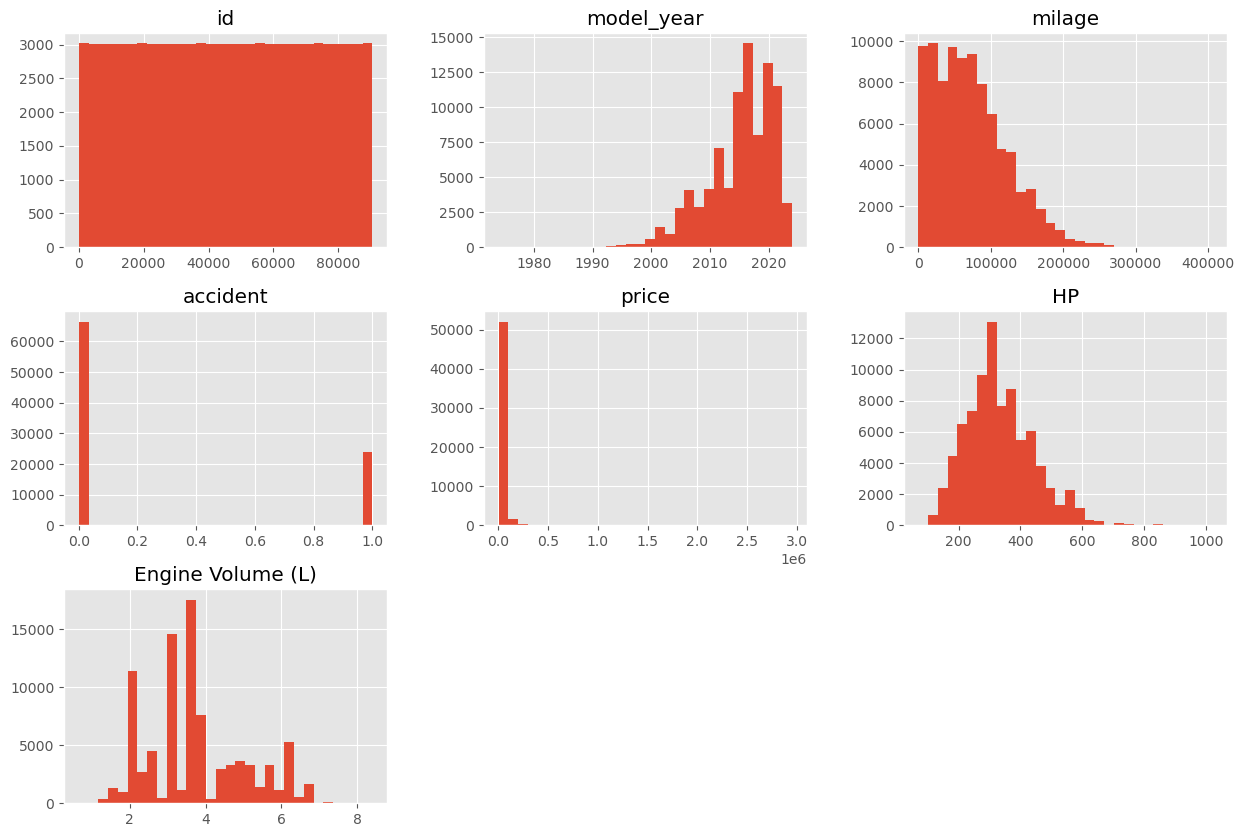

In [59]:
df.hist(figsize=(15, 10), bins=30)  
plt.show()

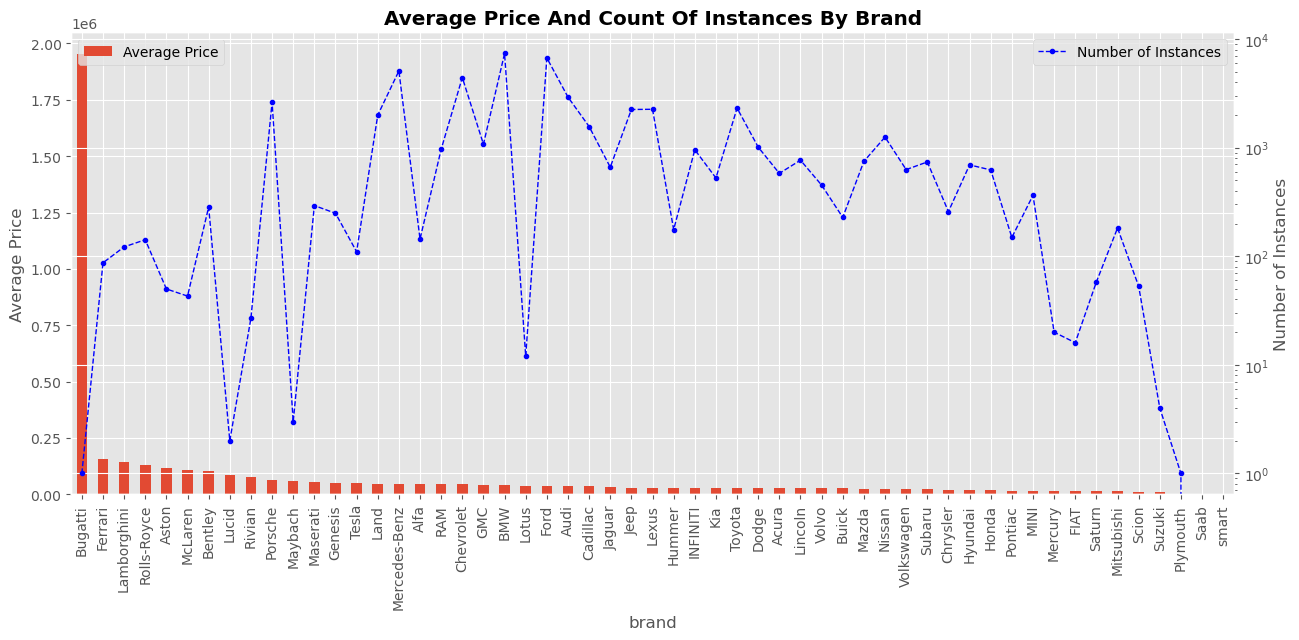

In [60]:
g=df.groupby('brand').agg({'price':['mean','count']}).sort_values(('price','mean'),ascending=False)

fig,ax=plt.subplots(figsize=(15,6))
ax2=ax.twinx()
g.plot.bar(ax=ax,y=('price','mean'),label='Average Price')
g.plot.line(ax=ax2,y=('price','count'),color='blue',ls='--',lw=1,marker='.',label='Number of Instances')
#ax2.axhline(2,ls='--',color='black')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax.set_title('Average Price And Count Of Instances By Brand',fontweight='bold')
ax.set_ylabel('Average Price')
ax2.set_ylabel('Number of Instances')
plt.show()

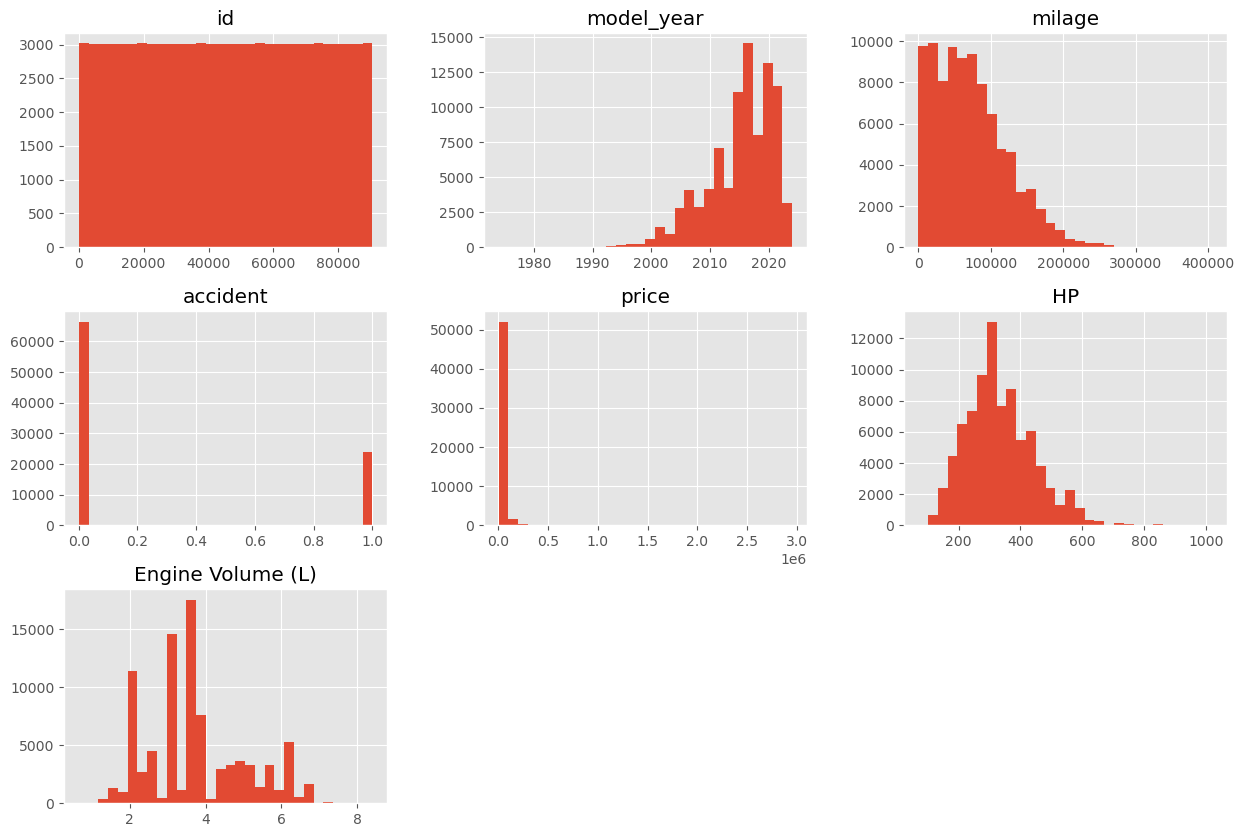

In [61]:
df.hist(figsize=(15, 10), bins=30)
plt.show()

In [62]:
print(test.shape)


(36183, 12)


In [63]:
print(train.shape)

(54273, 13)


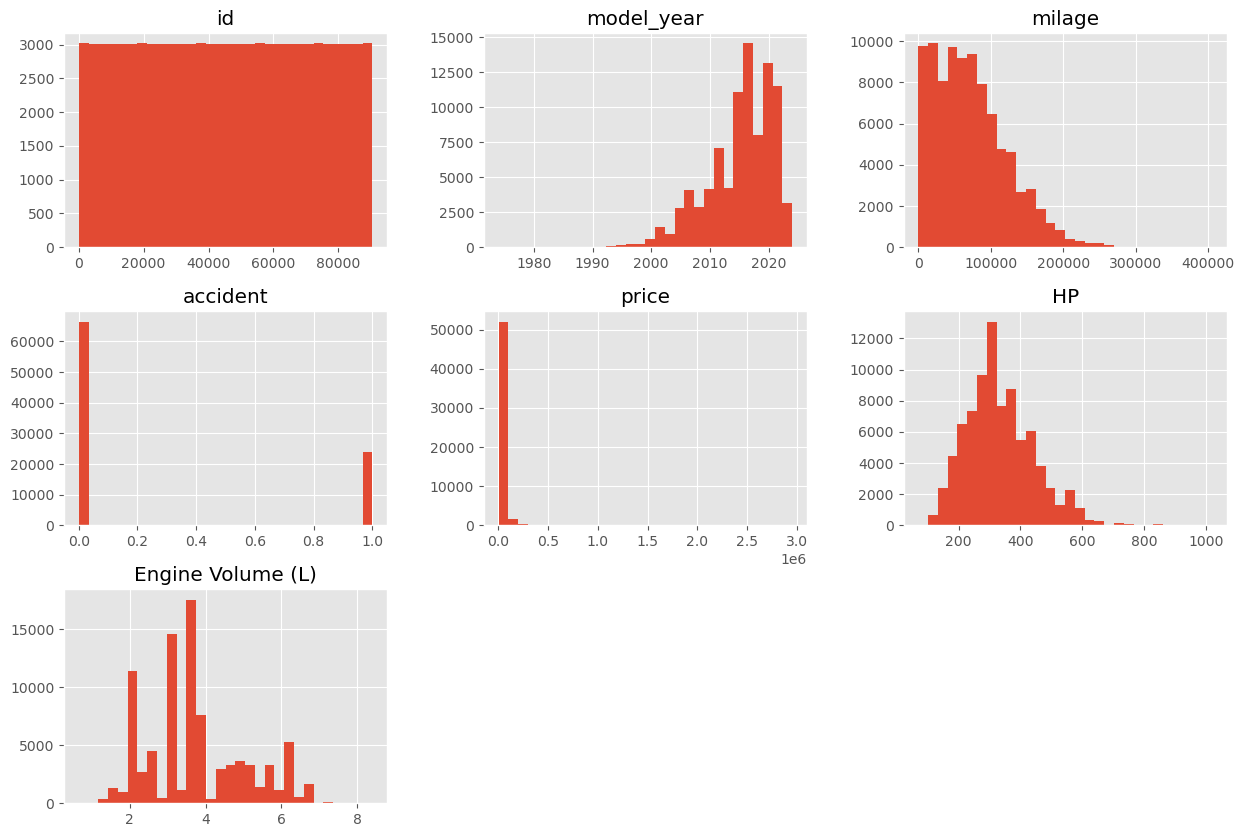

In [64]:
df.hist(figsize=(15,10),bins=30)
plt.show()

In [65]:
print(test.shape)

(36183, 12)


In [66]:
for col in df.select_dtypes('O').columns:
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=False)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)
print(df.shape)
print(test.shape)

(90456, 71)
(36183, 12)


In [67]:
df

,id,model_year,milage,accident,price,HP,Engine Volume (L),brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_FIAT,brand_Ferrari,brand_Ford,brand_GMC,brand_Genesis,brand_Honda,brand_Hummer,brand_Hyundai,brand_INFINITI,brand_Jaguar,brand_Jeep,brand_Kia,brand_Lamborghini,brand_Land,brand_Lexus,brand_Lincoln,brand_Lotus,brand_Lucid,brand_MINI,brand_Maserati,brand_Maybach,brand_Mazda,brand_McLaren,brand_Mercedes-Benz,brand_Mercury,brand_Mitsubishi,brand_Nissan,brand_Plymouth,brand_Pontiac,brand_Porsche,brand_RAM,brand_Rivian,brand_Rolls-Royce,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_electric,fuel_type_–,transmission_False,transmission_True
0,0,2018,74349,0,11000.0,375.0,3.5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,1,2007,80000,0,8250.0,300.0,3.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,2,2009,91491,0,15000.0,300.0,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,3,2022,2437,0,63500.0,335.0,3.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,4,2001,111000,0,7850.0,200.0,3.8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90451,90451,2019,4500,0,NaN,420.0,6.2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
90452,90452,2004,185000,1,NaN,295.0,5.3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [68]:
print(n_train)
print(df.shape)
train = df[:n_train]
test = df[n_train:]
train=train.dropna(subset=['HP','Engine Volume (L)'])

for col in train.select_dtypes([int,float]).columns:
    print(col)
    col_mean=train[col].mean()
    col_std=train[col].std()
    lower_bound=col_mean-2*col_std
    upper_bound=col_mean+2*col_std
    train=train[(train[col]<upper_bound)&(train[col]>lower_bound)]


X_train=train.drop(columns='price')
y_train=train['price']
X_test=test.drop(columns='price')
y_test=test['price']
test.head()
print(test.shape)

54273
(90456, 71)
id
model_year
milage
accident
price
HP
Engine Volume (L)
(36183, 71)


In [69]:


#stratify_cols=df.columns[df.columns.str.contains('brand_')]

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [70]:
from xgboost import XGBRegressor

In [71]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='neg_root_mean_squared_error',
        verbose=1
    )
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve for XGBoost Classifier')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[learning_curve] Training set sizes: [ 2802  5604  8406 11208 14010 16812 19614 22416 25218 28020]


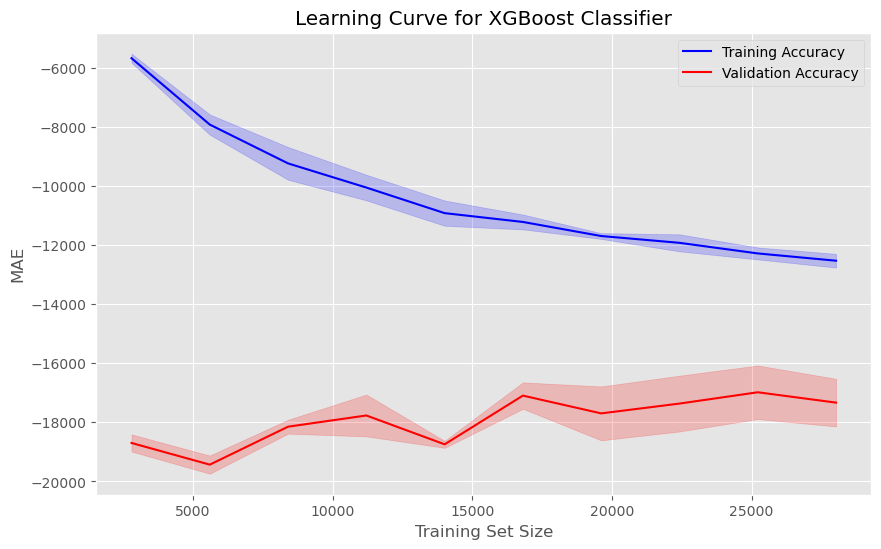

(36183, 71)


In [72]:
plot_learning_curve(XGBRegressor()) #initial model
print(test.shape)

In [73]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}

grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=10)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 1/3; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-17568.185 total time=   0.5s
[CV 2/3; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 2/3; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-18115.843 total time=   0.4s
[CV 3/3; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 3/3; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-17820.176 total time=   0.4s
[CV 1/3; 2/64] START learning_rate=0.01, max_depth=3, n_estimators=500..........
[CV 1/3; 2/64] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=-15462.852 total time=   1.0s
[CV 2/3; 2/64] START learning_rate=0.01, max_depth=3, n_estimators=500..........
[CV 2/3; 2/64] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=-16165.015 total time=   1.7

[learning_curve] Training set sizes: [ 2802  5604  8406 11208 14010 16812 19614 22416 25218 28020]


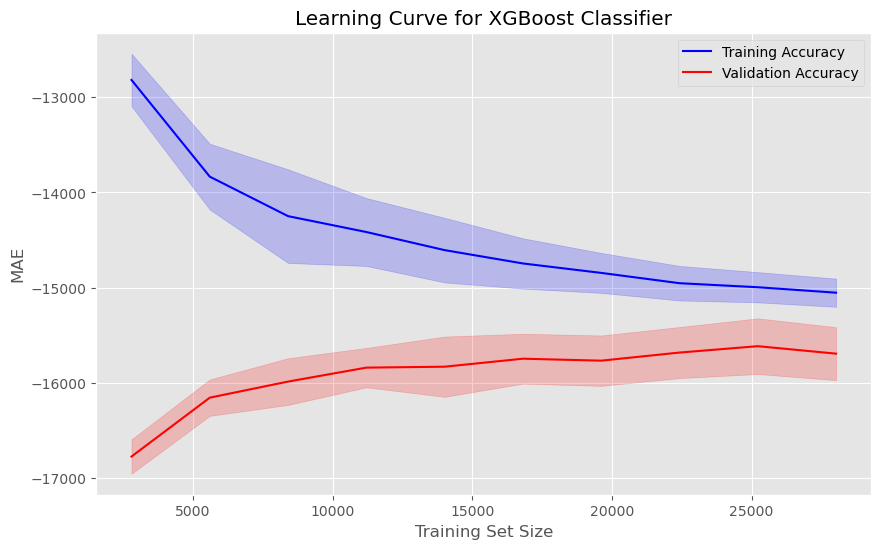

In [74]:
plot_learning_curve(best_model)

In [75]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)
print(df.shape,train.shape,X_test.shape)

test

(90456, 71) (42031, 71) (36183, 70)


,id,model_year,milage,accident,price,HP,Engine Volume (L),brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_FIAT,brand_Ferrari,brand_Ford,brand_GMC,brand_Genesis,brand_Honda,brand_Hummer,brand_Hyundai,brand_INFINITI,brand_Jaguar,brand_Jeep,brand_Kia,brand_Lamborghini,brand_Land,brand_Lexus,brand_Lincoln,brand_Lotus,brand_Lucid,brand_MINI,brand_Maserati,brand_Maybach,brand_Mazda,brand_McLaren,brand_Mercedes-Benz,brand_Mercury,brand_Mitsubishi,brand_Nissan,brand_Plymouth,brand_Pontiac,brand_Porsche,brand_RAM,brand_Rivian,brand_Rolls-Royce,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_electric,fuel_type_–,transmission_False,transmission_True
54273,54273,2014,73000,0,NaN,302.0,3.5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
54274,54274,2015,128032,0,NaN,275.0,3.5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
54275,54275,2015,51983,0,NaN,241.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
54276,54276,2018,29500,1,NaN,518.0,5.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
54277,54277,2020,90000,1,NaN,335.0,3.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90451,90451,2019,4500,0,NaN,420.0,6.2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
90452,90452,2004,185000,1,NaN,295.0,5.3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [76]:
#print predicted values with id
result = pd.DataFrame({'ID': test['id'], 'Price': test_prediction})
print(result)
result.to_csv('results.csv', index=False)

          ID         Price
54273  54273  22110.007812
54274  54274  19147.353516
54275  54275  26753.875000
54276  54276  54872.019531
54277  54277  38597.273438
...      ...           ...
90451  90451  57892.597656
90452  90452  10108.259766
90453  90453  11136.142578
90454  90454  52106.316406
90455  90455  14656.002930

[36183 rows x 2 columns]
